In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import trend_analysis_nasa
from matplotlib.colors import ListedColormap


Bad key "text.kerning_factor" on line 4 in
/home/angela/anaconda3/envs/coral_datadownload/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
spm_rate = trend_analysis_nsa.trend()

number of products used for time analysis: 5
tru_all dim: (5, 1473, 1359)
mean: 3.401289701461792
mean: 3.4196784496307373
mean: 4.083607196807861
mean: 2.399540424346924
mean: 2.7572076320648193
index: 5
finished


In [92]:
print(f"min: {np.nanmin(spm_rate)}, max: {np.nanmax(spm_rate)}, median:{np.nanmedian(spm_rate)}, mean:{np.nanmean(spm_rate)}")


min: -40907.825708389304, max: 65050.38746833799, median:-658.1110024452214, mean:-640.3313293460507


In [8]:
lats = [-89.875+0.5*x for x in range(0, nlat//2)]
lons = [-179.875+0.5*x for x in range(0, nlon//2)]
print(len(lats))
print(len(lons))

1473
1359


/home/angela/anaconda3/envs/coral_datadownload/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


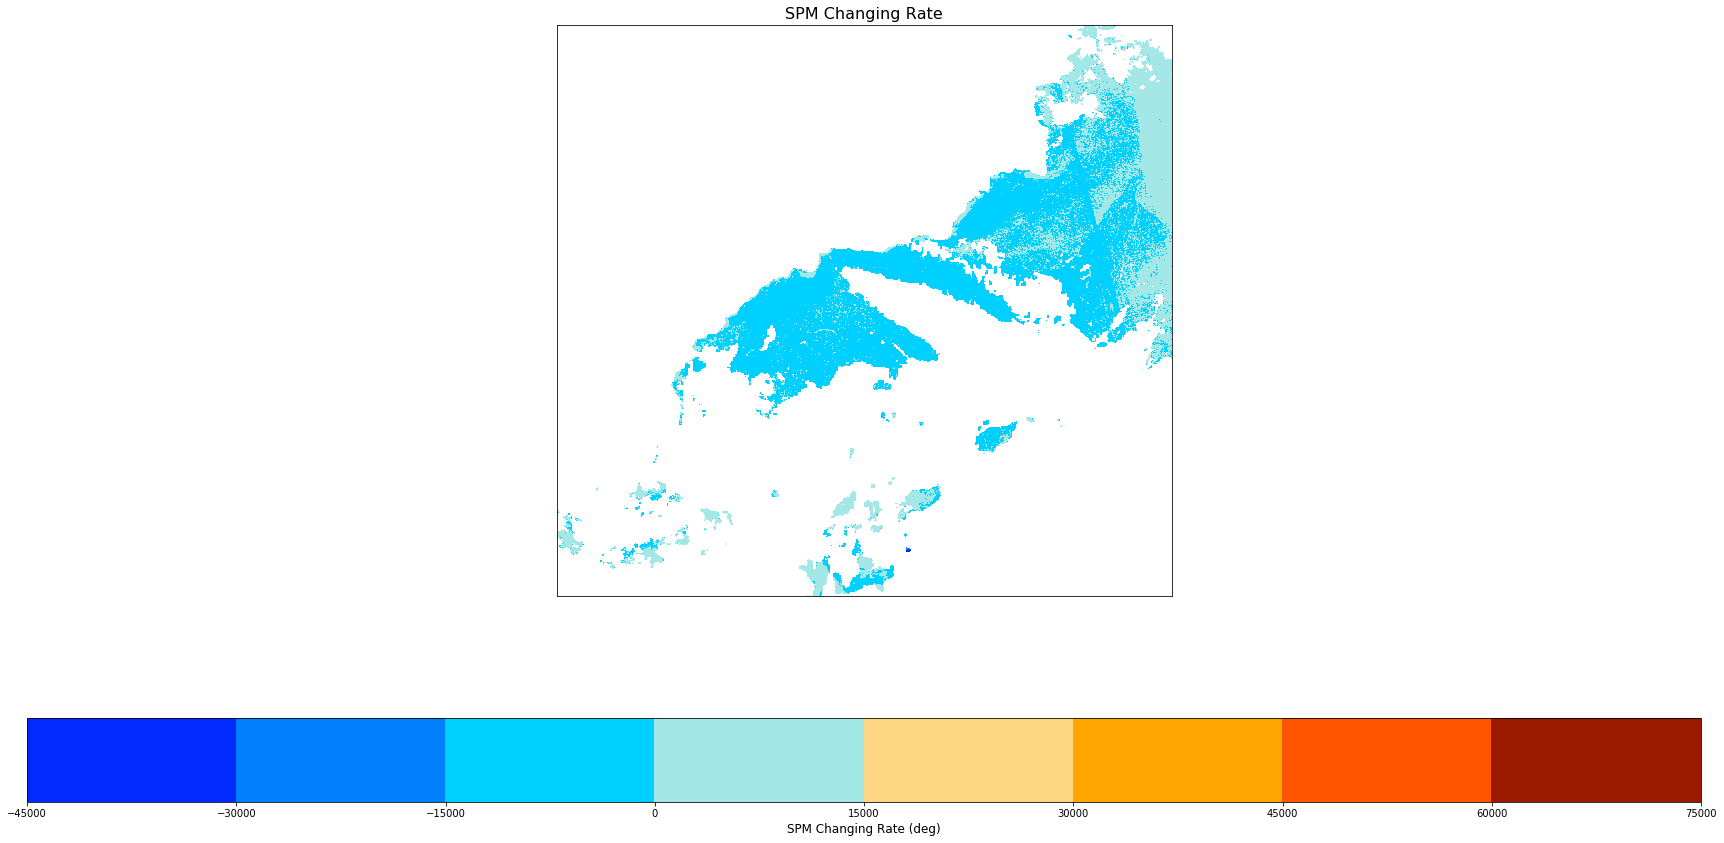

In [75]:

plt.figure()
nlat = 2946
nlon = 2718


nlons = nlon//2
nlats = nlat//2
min_lons, max_lons = 8.47069, 8.7383585
min_lats, max_lats = -83.481926, -83.23356
lons = np.linspace(min_lons, max_lons, nlons)
lats = np.linspace(min_lats, max_lats, nlats)

m = Basemap(projection='cyl', llcrnrlon=min(lons), llcrnrlat=min(lats),
            urcrnrlon=max(lons), urcrnrlat=max(lats))
x, y = m(*np.meshgrid(lons, lats))
clevs = np.linspace(-0.5, 0.5, 21)
#cs = m.contourf(x, y, spm_rate.squeeze(), clevs, cmap=plt.cm.RdBu_r)
cs = m.contourf(x, y, spm_rate.squeeze(), cmap=cmp)

m.drawcoastlines()
#m.fillcontinents(color='#000000', lake_color='#99ffff')

cb = plt.colorbar(cs, orientation='horizontal')
cb.set_label('SPM Changing Rate (deg)', fontsize=12)
plt.title('SPM Changing Rate', fontsize=16)

plt.show()

In [9]:
def load_colormap(filename):
    """Load a colormap defined in a text file
    filename is the .txt file name located in the
    data/path, not the full path.
    list_available_colormaps() lists the available color tables
    """
    try:
        color_map_values = pd.read_csv(filename).to_numpy()/255.
        colormap = ListedColormap(color_map_values)
    except IOError:
        print(f"Cannot load colormap {filename}")
        raise
    colormap.set_bad("gray") # color of missing pixels
    colormap.set_under("white") # color of background, necessary if you want to use
    # this colormap directly with hp.mollview(m, cmap=colormap)
    # healpy tutorial see:https://healpy.readthedocs.io/en/latest/tutorial.html
    return colormap

In [14]:
cmp = load_colormap('data/planck_parchment_rgb.csv')

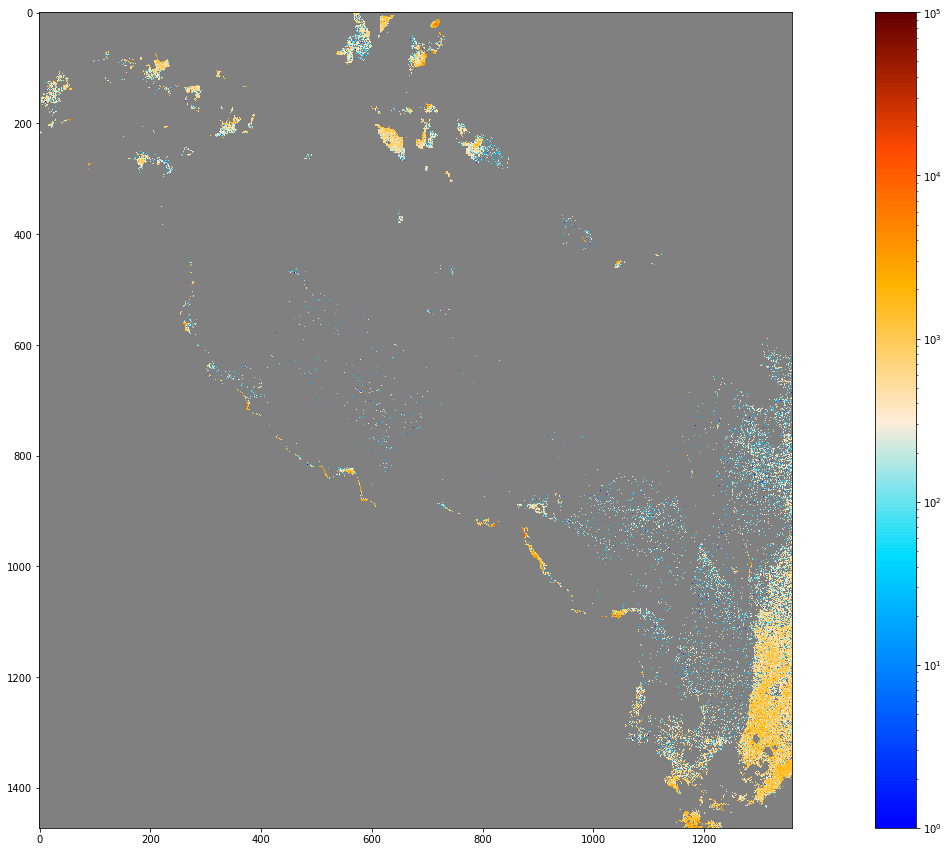

In [84]:
from matplotlib.colors import Normalize, LogNorm 
# Plot the green band using a non-default color ramp & a color bar
# see also: https://matplotlib.org/users/colormaps.html
plt.rcParams["figure.figsize"] = (30,15)

fig = plt.imshow(spm_rate, norm=Normalize(0,100000))
fig = plt.imshow(spm_rate, norm=LogNorm(1,100000))

fig.set_cmap(cmp)
plt.colorbar()
plt.show()

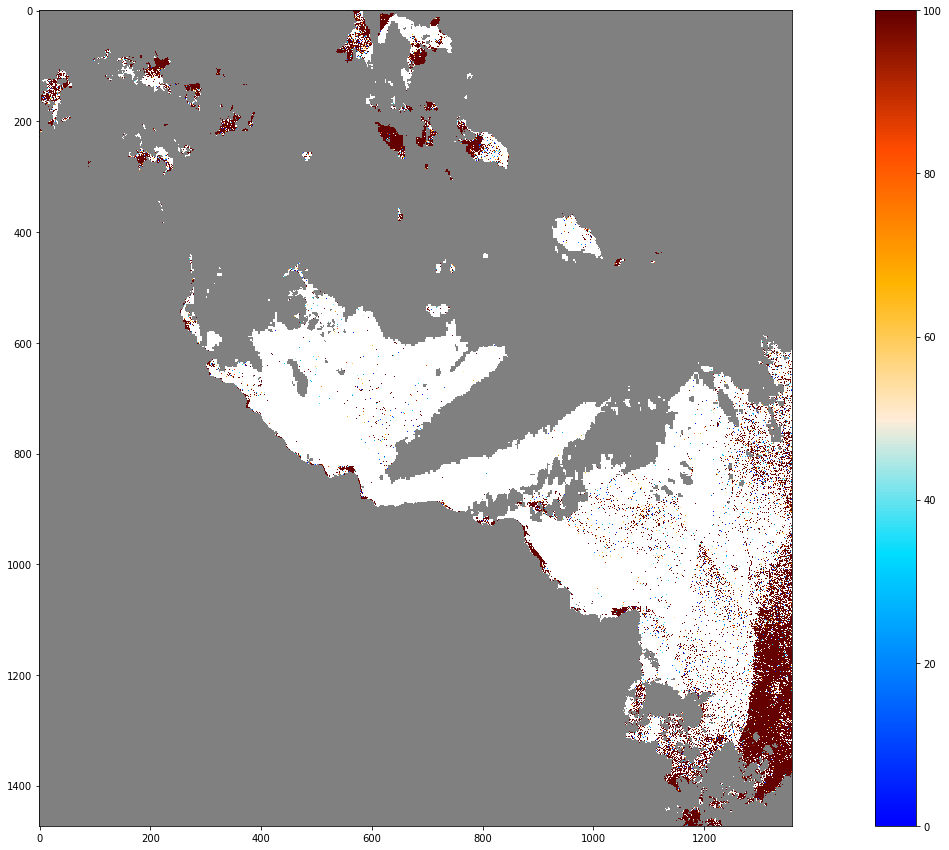

In [87]:
from matplotlib.colors import Normalize, LogNorm 
# Plot the green band using a non-default color ramp & a color bar
# see also: https://matplotlib.org/users/colormaps.html
plt.rcParams["figure.figsize"] = (30,15)

fig = plt.imshow(spm_rate, norm=Normalize(0,100))

fig.set_cmap(cmp)
plt.colorbar()
plt.show()

In [95]:
print(f"tur_rate dims: {spm_rate.shape}")

tur_rate dims: (1473, 1359)
